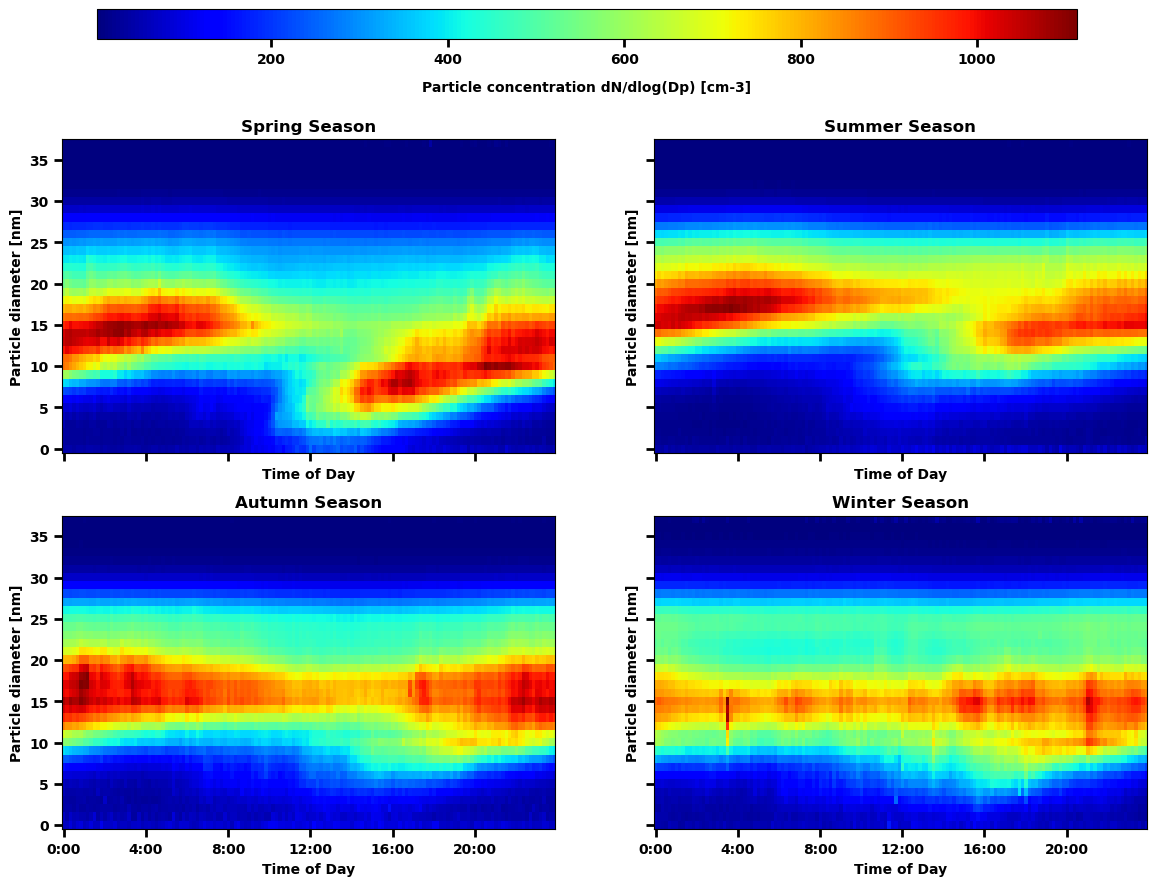

In [9]:
# 22August (PSD, (10minutes average of a day (1440)) 4 seasons) 1Pg 4 Plots

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the file path and file name
file_path = '/Users/touqeergill/Desktop/MajorFile(PSD).xlsx'

# Load the data from the Excel file
data = pd.read_excel(file_path, index_col='datetime', parse_dates=True)

# Define the seasons by months for Finland
seasons = {
    'Spring': (3, 4, 5),
    'Summer': (6, 7, 8),
    'Autumn': (9, 10, 11),
    'Winter': (12, 1, 2)
}

# Create a DataFrame for each season by filtering data based on month
seasonal_data = {}
time_index = pd.date_range("00:00", "23:50", freq="10T").time  # Uniform time index
for season, months in seasons.items():
    mask = data.index.month.isin(months)
    seasonal_resampled = data[mask].resample('10T').mean()
    seasonal_data[season] = seasonal_resampled.groupby(seasonal_resampled.index.time).mean().reindex(time_index, fill_value=0)

# Set up the figure for plotting with a jet-like color map for better contrast and visual appeal
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)

# Plot each season's data using a vibrant colormap (similar to 'jet')
for ax, (season, data) in zip(axes.flatten(), seasonal_data.items()):
    im = ax.imshow(data.values.T, aspect='auto', interpolation='none', cmap='jet', origin='lower')
    ax.set_title(f"{season} Season", fontweight='bold')
    ax.set_xlabel('Time of Day', fontweight='bold')
    ax.set_ylabel('Particle diameter [nm]', fontweight='bold')
    ax.set_xticks(range(0, len(data), 24))  # Every 4 hours
    ax.set_xticklabels([f"{t}:00" for t in range(0, 24, 4)], fontweight='bold')
    # Applying bold labels manually to ensure all are correctly formatted
    ax.tick_params(direction='out', length=6, width=2, colors='black', grid_color='black', grid_alpha=0.5, labelsize='medium')
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

# Adjust layout to accommodate the colorbar correctly at the very top
plt.subplots_adjust(top=0.8)

# Add colorbar at the top above the subplots and adjust for more space, with bold ticks
cbar_ax = fig.add_axes([0.15, 0.9, 0.7, 0.03])  # Higher position for colorbar
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Particle concentration dN/dlog(Dp) [cm-3]', labelpad=10, fontweight='bold')
cbar.ax.tick_params(direction='out', length=6, width=2, labelsize=10)  # Ensuring ticks are bold
for label in cbar.ax.get_xticklabels():
    label.set_fontweight('bold')  # Make colorbar ticks bold

# Show plot
plt.show()


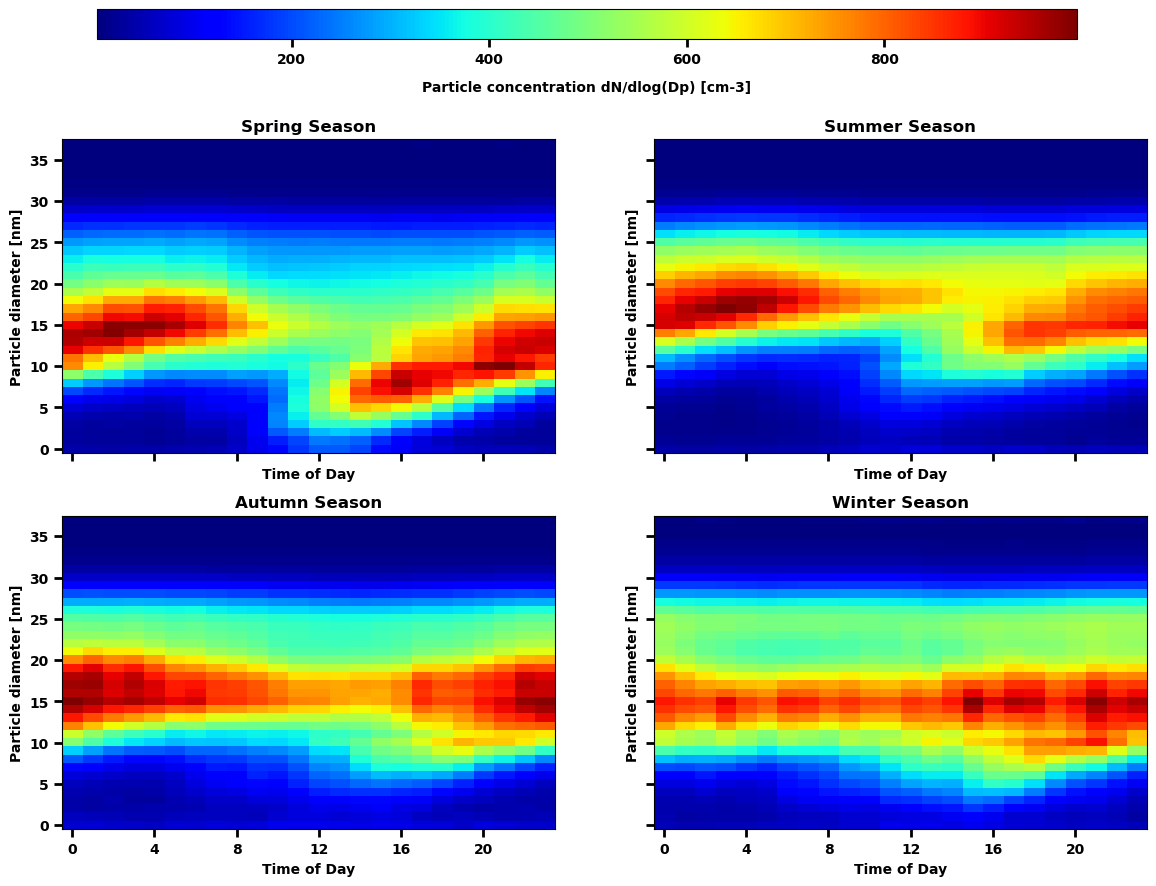

In [5]:
# 22August (PSD, (10minutes average of a day (1440)) 4 seasons) 1Pg 4 Plots

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the file path and file name
file_path = '/Users/touqeergill/Desktop/MajorFile(PSD).xlsx'

# Load the data from the Excel file
data = pd.read_excel(file_path, index_col='datetime', parse_dates=True)

# Define the seasons by months for Finland
seasons = {
    'Spring': (3, 4, 5),
    'Summer': (6, 7, 8),
    'Autumn': (9, 10, 11),
    'Winter': (12, 1, 2)
}

# Create a DataFrame for each season by filtering data based on month
seasonal_data = {}
time_index = pd.date_range("00:00", "23:00", freq="H").time  # Uniform time index
for season, months in seasons.items():
    mask = data.index.month.isin(months)
    seasonal_resampled = data[mask].resample('H').mean()  # Change to hourly average
    seasonal_data[season] = seasonal_resampled.groupby(seasonal_resampled.index.time).mean().reindex(time_index, fill_value=0)

# Set up the figure for plotting with a jet-like color map for better contrast and visual appeal
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)

# Plot each season's data using a vibrant colormap (similar to 'jet')
for ax, (season, data) in zip(axes.flatten(), seasonal_data.items()):
    im = ax.imshow(data.values.T, aspect='auto', interpolation='none', cmap='jet', origin='lower')
    ax.set_title(f"{season} Season", fontweight='bold')
    ax.set_xlabel('Time of Day', fontweight='bold')
    ax.set_ylabel('Particle diameter [nm]', fontweight='bold')
    ax.set_xticks([0, 4, 8, 12, 16, 20])  # Define custom ticks for every 4 hours
    ax.set_xticklabels(['0', '4', '8', '12', '16', '20'], fontweight='bold')  # Set labels as requested
    ax.tick_params(direction='out', length=6, width=2, colors='black', grid_color='black', grid_alpha=0.5, labelsize='medium')
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

# Adjust layout to accommodate the colorbar correctly at the very top
plt.subplots_adjust(top=0.8)

# Add colorbar at the top above the subplots and adjust for more space, with bold ticks
cbar_ax = fig.add_axes([0.15, 0.9, 0.7, 0.03])  # Higher position for colorbar
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Particle concentration dN/dlog(Dp) [cm-3]', labelpad=10, fontweight='bold')
cbar.ax.tick_params(direction='out', length=6, width=2, labelsize=10)  # Ensuring ticks are bold
for label in cbar.ax.get_xticklabels():
    label.set_fontweight('bold')  # Make colorbar ticks bold

# Show plot
plt.show()